<a href="https://colab.research.google.com/github/Ritvik10/Data-Science-Overview-Material-Practice-and-Revision/blob/main/Day_50_K_Mean_Clustering%2C_Hierarchical_Clustering_and_Project_on_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold

# Importing the dataset

Link: https://drive.google.com/file/d/1x2_iUVPsM2T6fHMQDAKNYqwsUdZlW6hM/view?usp=sharing

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/marketing_campaign.csv', sep='\t')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# EDA - DE, DM, DC, DV

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
df.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


In [6]:
df.shape

(2240, 29)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [8]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [9]:
df.isna().sum().sum()

24

In [10]:
df.duplicated().sum()

0

In [11]:
df.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0


In [12]:
df.drop('ID', axis=1, inplace=True)

In [13]:
2022 - 1957

65

In [14]:
import datetime

In [15]:
df['Age'] = 2022 - df['Year_Birth']
# df['Age'] = datetime.date.today().year - df['Year_Birth']

In [16]:
df["Age"]

0       65
1       68
2       57
3       38
4       41
        ..
2235    55
2236    76
2237    41
2238    66
2239    68
Name: Age, Length: 2240, dtype: int64

In [17]:
df.drop('Year_Birth', axis=1, inplace=True)

In [18]:
df.Education.value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [20]:
"""
B -> Undergraduate
B -> Graduate

B -> Undergraduate
M -> Postgraduate
"""

'\nB -> Undergraduate\nB -> Graduate\n\nB -> Undergraduate\nM -> Postgraduate\n'

In [21]:
# Undergraduate - Basic, 2n Cycle, Graduation
# Postgraduate - Master, PhD

df.Education.replace(['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD'],
                     ['Undergraduate', 'Undergraduate', 'Undergraduate', 'Postgraduate', 'Postgraduate'],
                     inplace=True)

In [22]:
df.Education.value_counts()

Undergraduate    1384
Postgraduate      856
Name: Education, dtype: int64

In [23]:
le = LabelEncoder()

In [24]:
df.Education = le.fit_transform(df.Education)

In [25]:
df.Education.value_counts()

1    1384
0     856
Name: Education, dtype: int64

In [26]:
df.head(2)

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,1,Single,58138.0,0,0,04-09-2012,58,635,88,546,...,0,0,0,0,0,0,3,11,1,65
1,1,Single,46344.0,1,1,08-03-2014,38,11,1,6,...,0,0,0,0,0,0,3,11,0,68


In [27]:
df.Marital_Status.value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [28]:
# Alone - Single, Divorced, Widow, Alone, Absurd, YOLO
# Partner - Married, Together

In [29]:
df.Marital_Status.replace(['Single', 'Divorced', 'Widow', 'Absurd', 'YOLO', 'Married', 'Together'],
                          ['Alone', 'Alone', 'Alone', 'Alone', 'Alone', 'Partner', 'Partner'],
                          inplace=True)

In [30]:
df.Marital_Status.value_counts()

Partner    1444
Alone       796
Name: Marital_Status, dtype: int64

In [31]:
df.Marital_Status = le.fit_transform(df.Marital_Status)

In [32]:
df.Marital_Status.value_counts()

1    1444
0     796
Name: Marital_Status, dtype: int64

In [33]:
df.head(2)

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,1,0,58138.0,0,0,04-09-2012,58,635,88,546,...,0,0,0,0,0,0,3,11,1,65
1,1,0,46344.0,1,1,08-03-2014,38,11,1,6,...,0,0,0,0,0,0,3,11,0,68


In [34]:
# Mean
df.Income.mean()

52247.25135379061

In [35]:
# Median
df.Income.median()

51381.5

In [36]:
# Mode
df.Income.mode()

0    7500.0
Name: Income, dtype: float64

In [37]:
df.Income.describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

<Axes: >

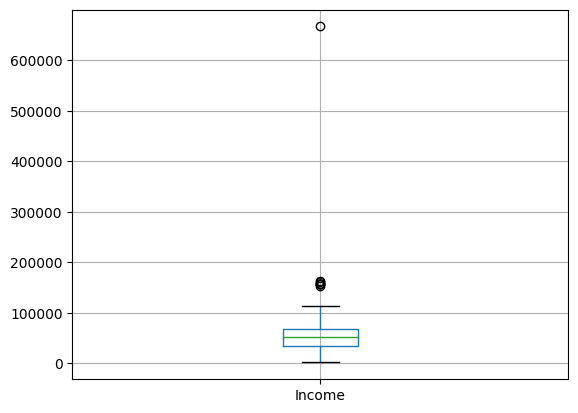

In [38]:
df[['Income']].boxplot()

In [39]:
df.Income.fillna(df.Income.median(), inplace=True)

In [40]:
df.Income.isnull().sum()

0

<Axes: >

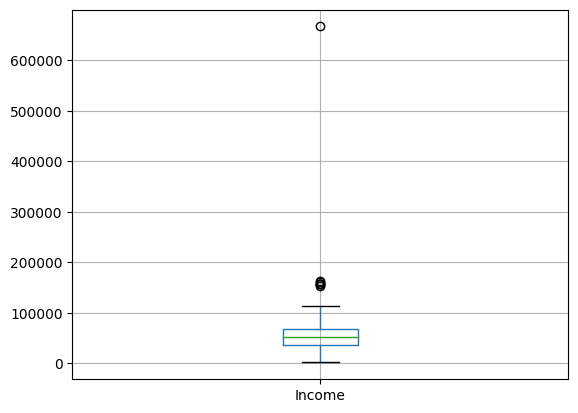

In [41]:
df[['Income']].boxplot()

In [42]:
in_mean = df.Income.mean()
in_std = df.Income.std()
threshold = 3
outliers = []

In [43]:
for i in df.Income:
  z = (i - in_mean)/in_std
  if z > threshold:
    outliers.append(i)

In [44]:
outliers

[157243.0,
 162397.0,
 153924.0,
 160803.0,
 157733.0,
 157146.0,
 156924.0,
 666666.0]

<Axes: >

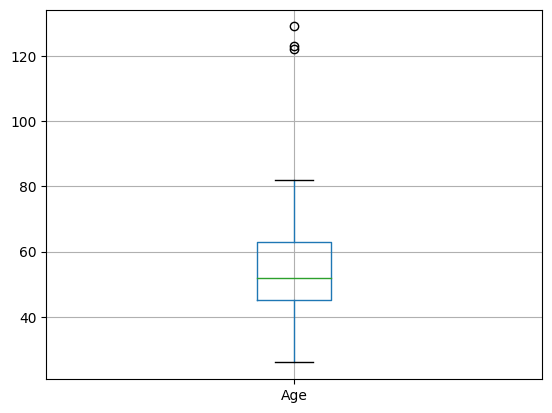

In [45]:
df[['Age']].boxplot()

In [46]:
df.Age.describe()

count    2240.000000
mean       53.194196
std        11.984069
min        26.000000
25%        45.000000
50%        52.000000
75%        63.000000
max       129.000000
Name: Age, dtype: float64

In [47]:
age_mean = df.Age.mean()
age_std = df.Age.std()
threshold = 3
age_outliers = []

In [48]:
for i in df.Age:
  z = (i - age_mean)/age_std
  if z > threshold:
    age_outliers.append(i)

In [49]:
age_outliers

[122, 129, 123]

In [50]:
int(df.Age.median())

52

In [51]:
df.Age.replace(age_outliers,
               [int(df.Age.median()),int(df.Age.median()),int(df.Age.median())],
               inplace=True)

<Axes: >

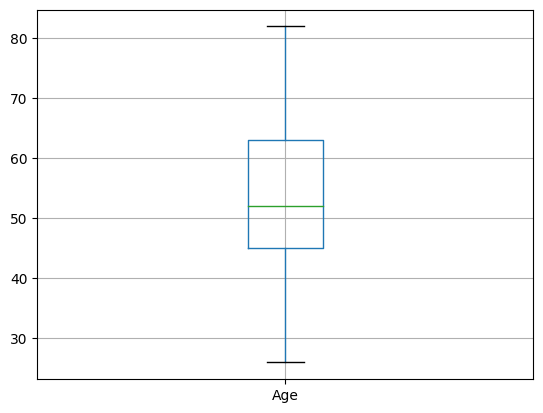

In [52]:
df[['Age']].boxplot()

In [53]:
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,1,0,58138.0,0,0,04-09-2012,58,635,88,546,...,0,0,0,0,0,0,3,11,1,65
1,1,0,46344.0,1,1,08-03-2014,38,11,1,6,...,0,0,0,0,0,0,3,11,0,68
2,1,1,71613.0,0,0,21-08-2013,26,426,49,127,...,0,0,0,0,0,0,3,11,0,57
3,1,1,26646.0,1,0,10-02-2014,26,11,4,20,...,0,0,0,0,0,0,3,11,0,38
4,0,1,58293.0,1,0,19-01-2014,94,173,43,118,...,0,0,0,0,0,0,3,11,0,41


In [54]:
# ChildreHome
0
1
1
1

1

In [55]:
df['ChildreHome'] = df.Kidhome + df.Teenhome

In [56]:
df['ChildreHome']

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: ChildreHome, Length: 2240, dtype: int64

In [57]:
df.drop(['Kidhome', 'Teenhome'], axis=1, inplace=True)

In [58]:
df.head()

,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,ChildreHome
0,1,0,58138.0,04-09-2012,58,635,88,546,172,88,...,0,0,0,0,0,3,11,1,65,0
1,1,0,46344.0,08-03-2014,38,11,1,6,2,1,...,0,0,0,0,0,3,11,0,68,2
2,1,1,71613.0,21-08-2013,26,426,49,127,111,21,...,0,0,0,0,0,3,11,0,57,0
3,1,1,26646.0,10-02-2014,26,11,4,20,10,3,...,0,0,0,0,0,3,11,0,38,1
4,0,1,58293.0,19-01-2014,94,173,43,118,46,27,...,0,0,0,0,0,3,11,0,41,1


In [59]:
type(df.Dt_Customer[0])

str

In [60]:
pd.DatetimeIndex(df['Dt_Customer']).year

<ipython-input-60-002a2cd92f68>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  pd.DatetimeIndex(df['Dt_Customer']).year


Int64Index([2012, 2014, 2013, 2014, 2014, 2013, 2012, 2013, 2013, 2014,
            ...
            2013, 2012, 2012, 2013, 2013, 2013, 2014, 2014, 2014, 2012],
           dtype='int64', name='Dt_Customer', length=2240)

In [61]:
df.Dt_Customer = datetime.date.today().year - pd.DatetimeIndex(df['Dt_Customer']).year

<ipython-input-61-8cdaa27564aa>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df.Dt_Customer = datetime.date.today().year - pd.DatetimeIndex(df['Dt_Customer']).year


In [62]:
df.head()

,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,ChildreHome
0,1,0,58138.0,11,58,635,88,546,172,88,...,0,0,0,0,0,3,11,1,65,0
1,1,0,46344.0,9,38,11,1,6,2,1,...,0,0,0,0,0,3,11,0,68,2
2,1,1,71613.0,10,26,426,49,127,111,21,...,0,0,0,0,0,3,11,0,57,0
3,1,1,26646.0,9,26,11,4,20,10,3,...,0,0,0,0,0,3,11,0,38,1
4,0,1,58293.0,9,94,173,43,118,46,27,...,0,0,0,0,0,3,11,0,41,1


In [63]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Dt_Customer', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response', 'Age', 'ChildreHome'],
      dtype='object')

In [64]:
df['Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [65]:
df.drop(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds'], axis=1, inplace=True)

In [66]:
df.head()

,Education,Marital_Status,Income,Dt_Customer,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,ChildreHome,Spent
0,1,0,58138.0,11,58,3,8,10,4,7,...,0,0,0,0,3,11,1,65,0,1617
1,1,0,46344.0,9,38,2,1,1,2,5,...,0,0,0,0,3,11,0,68,2,27
2,1,1,71613.0,10,26,1,8,2,10,4,...,0,0,0,0,3,11,0,57,0,776
3,1,1,26646.0,9,26,2,2,0,4,6,...,0,0,0,0,3,11,0,38,1,53
4,0,1,58293.0,9,94,5,5,3,6,5,...,0,0,0,0,3,11,0,41,1,422


In [67]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Dt_Customer', 'Recency',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age',
       'ChildreHome', 'Spent'],
      dtype='object')

In [68]:
df['Purchase'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumWebVisitsMonth']

In [69]:
df.drop(['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth'], axis=1, inplace=True)

In [70]:
df.head(2)

,Education,Marital_Status,Income,Dt_Customer,Recency,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,ChildreHome,Spent,Purchase
0,1,0,58138.0,11,58,0,0,0,0,0,0,3,11,1,65,0,1617,32
1,1,0,46344.0,9,38,0,0,0,0,0,0,3,11,0,68,2,27,11


In [71]:
df.AcceptedCmp3.value_counts()

0    2077
1     163
Name: AcceptedCmp3, dtype: int64

In [72]:
df.drop(['Z_CostContact',	'Z_Revenue'], axis=1, inplace=True)

In [73]:
df.head()

,Education,Marital_Status,Income,Dt_Customer,Recency,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,ChildreHome,Spent,Purchase
0,1,0,58138.0,11,58,0,0,0,0,0,0,1,65,0,1617,32
1,1,0,46344.0,9,38,0,0,0,0,0,0,0,68,2,27,11
2,1,1,71613.0,10,26,0,0,0,0,0,0,0,57,0,776,25
3,1,1,26646.0,9,26,0,0,0,0,0,0,0,38,1,53,14
4,0,1,58293.0,9,94,0,0,0,0,0,0,0,41,1,422,24


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Education       2240 non-null   int64  
 1   Marital_Status  2240 non-null   int64  
 2   Income          2240 non-null   float64
 3   Dt_Customer     2240 non-null   int64  
 4   Recency         2240 non-null   int64  
 5   AcceptedCmp3    2240 non-null   int64  
 6   AcceptedCmp4    2240 non-null   int64  
 7   AcceptedCmp5    2240 non-null   int64  
 8   AcceptedCmp1    2240 non-null   int64  
 9   AcceptedCmp2    2240 non-null   int64  
 10  Complain        2240 non-null   int64  
 11  Response        2240 non-null   int64  
 12  Age             2240 non-null   int64  
 13  ChildreHome     2240 non-null   int64  
 14  Spent           2240 non-null   int64  
 15  Purchase        2240 non-null   int64  
dtypes: float64(1), int64(15)
memory usage: 280.1 KB


In [76]:
#y = (x - min()) / (max() - min())

# Feature Scaling

In [77]:
scaler = MinMaxScaler()

In [78]:
scaler_df = scaler.fit_transform(df)

In [79]:
scaler_df[0]

array([1.        , 0.        , 0.08483222, 1.        , 0.58585859,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.69642857, 0.        , 0.63968254,
       0.69565217])

In [80]:
df.iloc[0]

Education             1.0
Marital_Status        0.0
Income            58138.0
Dt_Customer          11.0
Recency              58.0
AcceptedCmp3          0.0
AcceptedCmp4          0.0
AcceptedCmp5          0.0
AcceptedCmp1          0.0
AcceptedCmp2          0.0
Complain              0.0
Response              1.0
Age                  65.0
ChildreHome           0.0
Spent              1617.0
Purchase             32.0
Name: 0, dtype: float64

In [81]:
ssd = []
for i in range(1,11):
  Kmodel = KMeans(n_clusters=i, n_init=15, max_iter=500)
  Kmodel.fit(df)
  ssd.append(Kmodel.inertia_)

In [82]:
ssd

[1404441789980.1145,
 681176788452.9406,
 326106914090.9901,
 183332207605.90308,
 124214334803.85062,
 82920010367.76666,
 53621692354.75551,
 40946640124.00429,
 31132678931.157883,
 24203702350.07365]

Text(0.5, 1.0, 'Elbow plot')

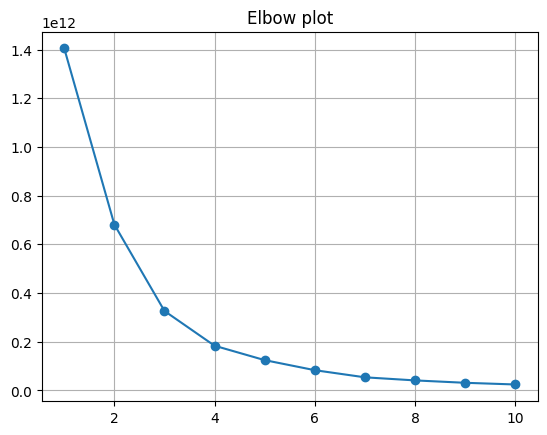

In [83]:
plt.plot(range(1,11), ssd, marker = 'o')
plt.grid()
plt.title('Elbow plot')

In [84]:
K = 6

In [85]:
Kmodel = KMeans(n_clusters=K)

In [86]:
Kmodel.fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6)

In [87]:
predict = Kmodel.predict(df)

In [88]:
predict[:10]

array([4, 2, 0, 3, 4, 4, 4, 2, 3, 3], dtype=int32)

In [89]:
df['Cluster'] = predict

In [90]:
df.head()

,Education,Marital_Status,Income,Dt_Customer,Recency,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,ChildreHome,Spent,Purchase,Cluster
0,1,0,58138.0,11,58,0,0,0,0,0,0,1,65,0,1617,32,4
1,1,0,46344.0,9,38,0,0,0,0,0,0,0,68,2,27,11,2
2,1,1,71613.0,10,26,0,0,0,0,0,0,0,57,0,776,25,0
3,1,1,26646.0,9,26,0,0,0,0,0,0,0,38,1,53,14,3
4,0,1,58293.0,9,94,0,0,0,0,0,0,0,41,1,422,24,4


In [91]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [92]:
var = linkage(df, method='ward')

{'icoord': [[35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [15.0, 15.0, 32.5, 32.5],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [55.0, 55.0, 72.5, 72.5],
  [23.75, 23.75, 63.75, 63.75],
  [5.0, 5.0, 43.75, 43.75],
  [95.0, 95.0, 105.0, 105.0],
  [115.0, 115.0, 125.0, 125.0],
  [145.0, 145.0, 155.0, 155.0],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [165.0, 165.0, 182.5, 182.5],
  [150.0, 150.0, 173.75, 173.75],
  [135.0, 135.0, 161.875, 161.875],
  [120.0, 120.0, 148.4375, 148.4375],
  [100.0, 100.0, 134.21875, 134.21875],
  [24.375, 24.375, 117.109375, 117.109375],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [205.0, 205.0, 222.5, 222.5],
  [245.0, 245.0, 255.0, 255.0],
  [265.0, 265.0, 275.0, 275.0],
  [250.0, 250.0, 270.0, 270.0],
  [285.0, 285.0, 295.0, 295.0],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 325.0, 340.0, 340.0],
  [315.0, 315.0, 332.5, 332.5],
  [305.0, 305.0, 323.75, 323.75],
  [290.0, 290.0, 314.375, 

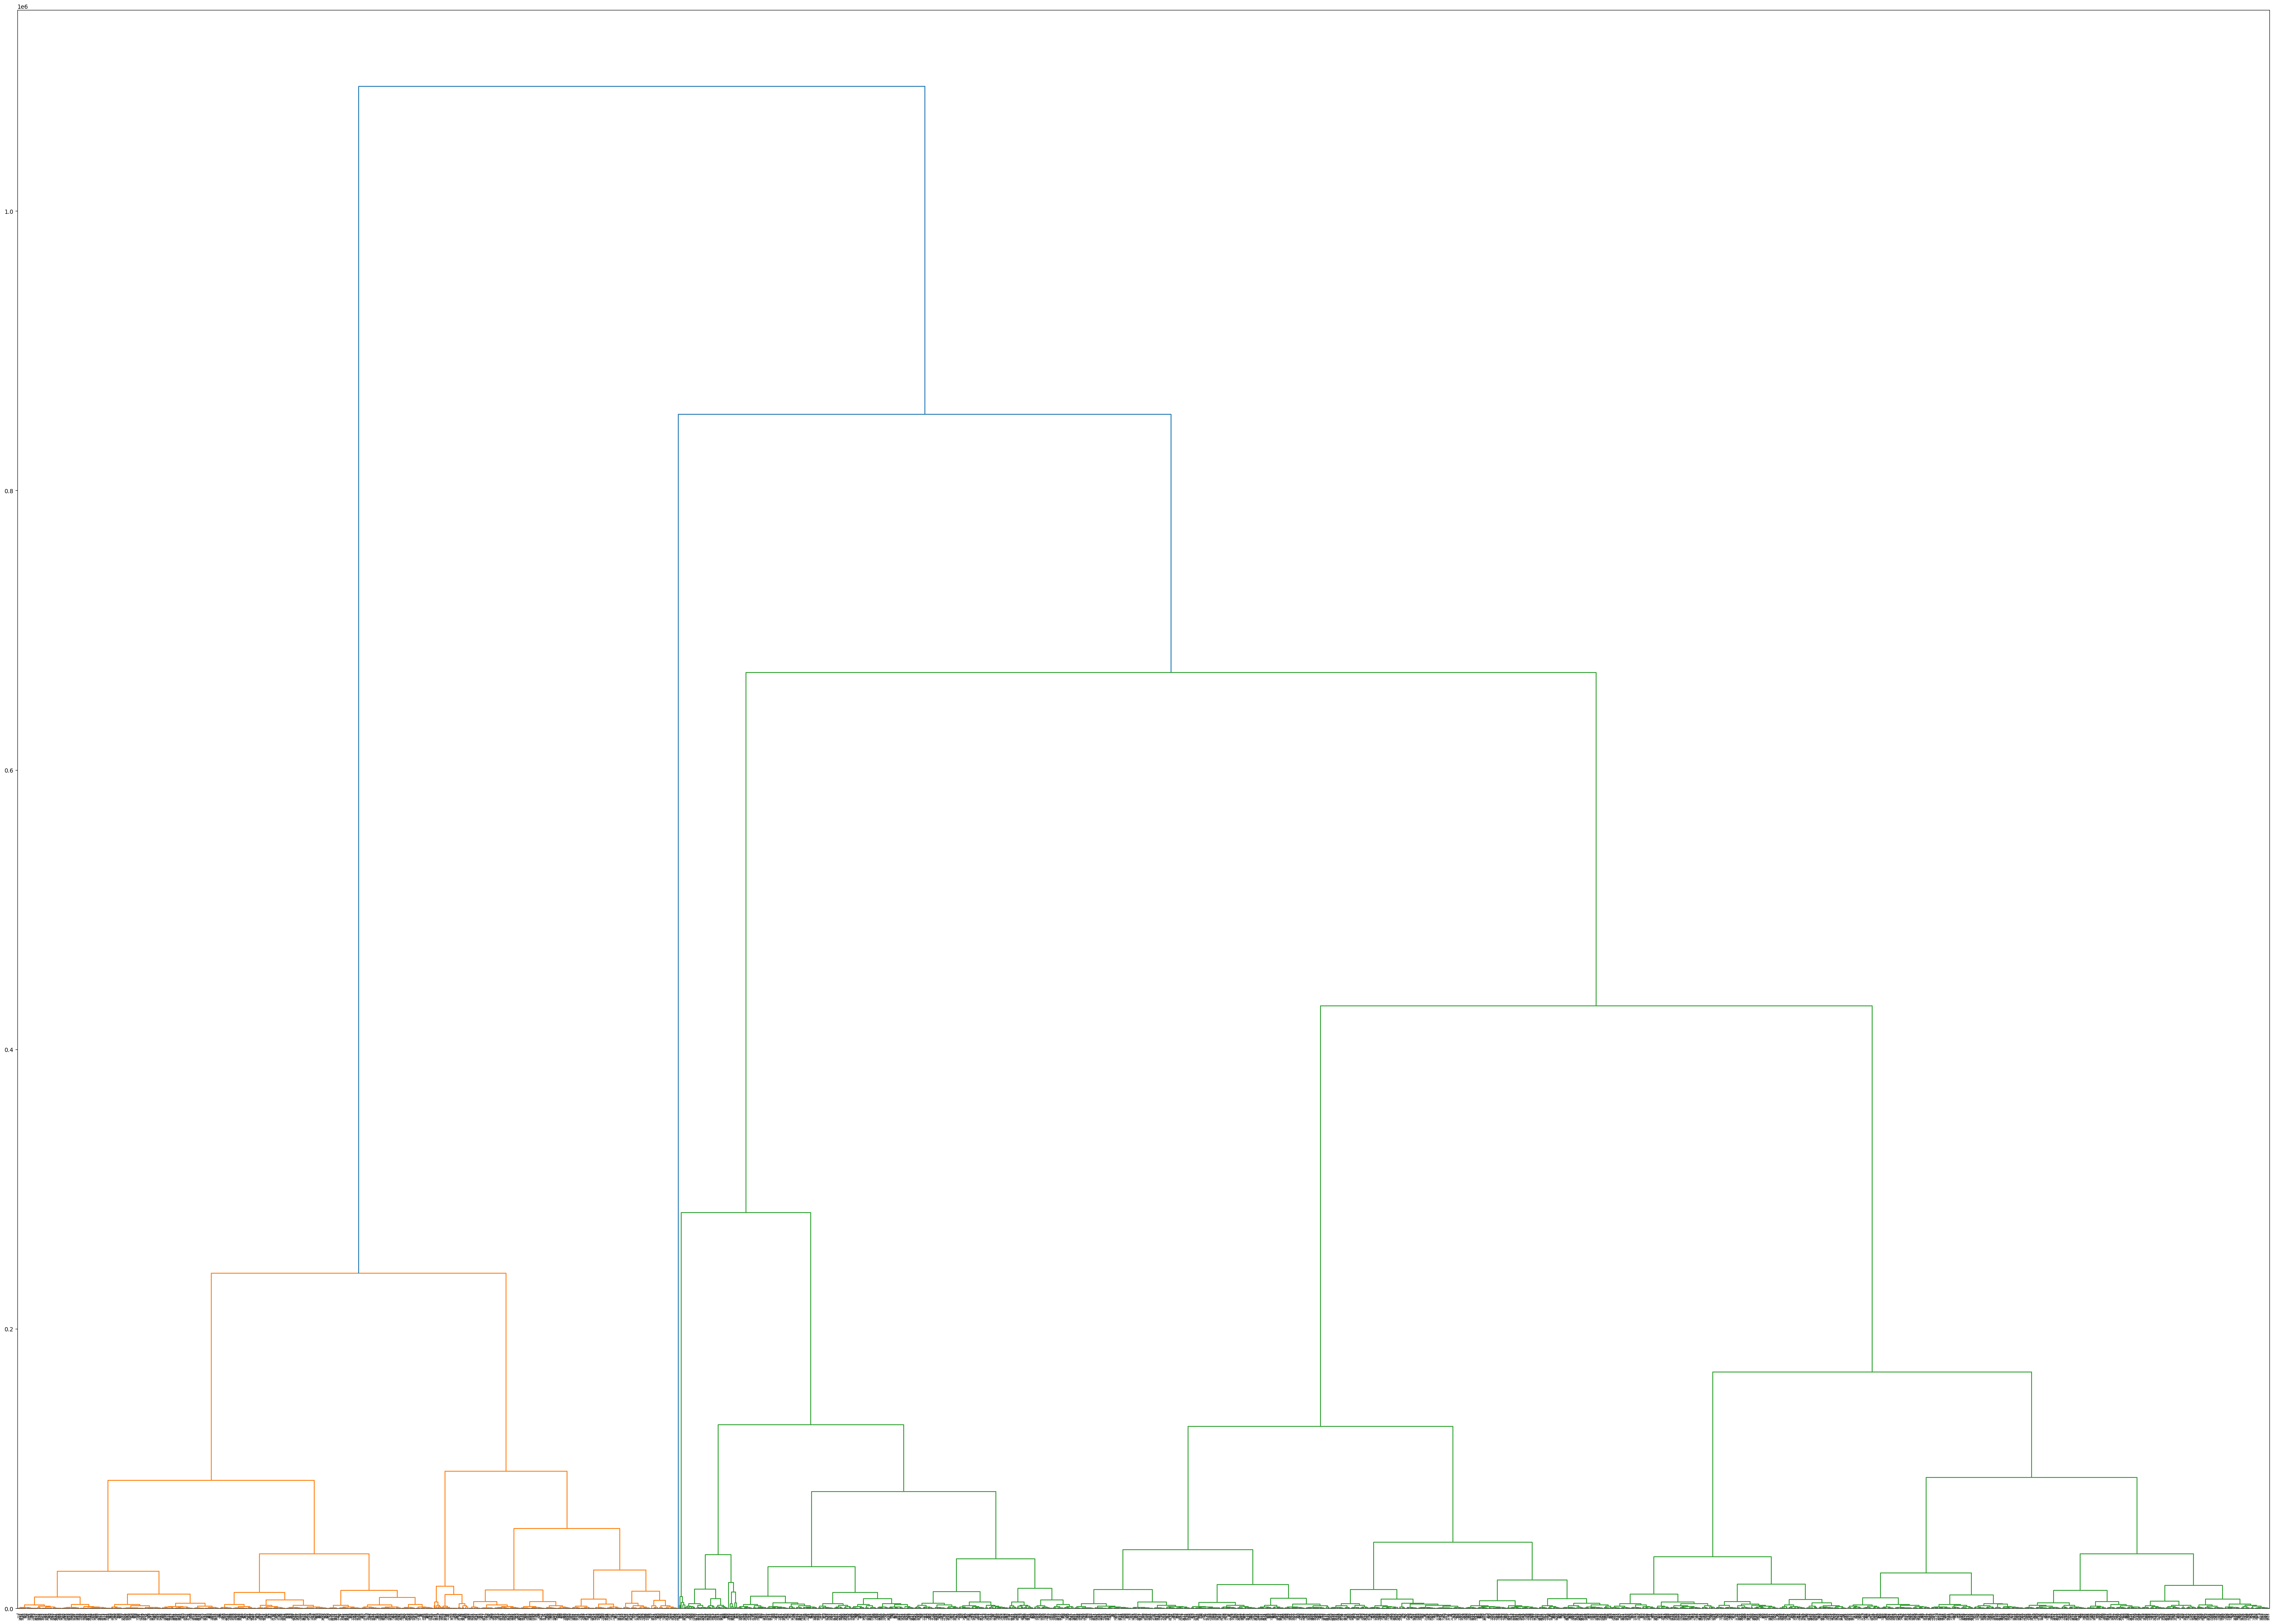

In [93]:
plt.figure(figsize=(70,50))
dendrogram(var, leaf_rotation=90)